In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../Data/raw.csv')

# I. Data profiling

In [24]:
df.shape


(1000, 12)

In [25]:
df.head()


,Household_ID,Region,Country,Energy_Source,Monthly_Usage_kWh,Year,Household_Size,Income_Level,Urban_Rural,Adoption_Year,Subsidy_Received,Cost_Savings_USD
0,H01502,North America,USA,Hydro,1043.49,2024,5,Low,Urban,2012,No,10.46
1,H02587,Australia,Australia,Geothermal,610.01,2024,4,High,Rural,2023,No,43.49
2,H02654,North America,USA,Biomass,1196.75,2024,8,Low,Rural,2017,Yes,93.28
3,H01056,South America,Colombia,Biomass,629.67,2024,7,High,Urban,2023,No,472.85
4,H00706,Africa,Egypt,Hydro,274.46,2022,7,Middle,Rural,2010,No,65.98


==> Household_IDs can be removed 

In [26]:
df=df[[#'Household_ID',
    'Region', 'Country', 'Energy_Source',
       'Monthly_Usage_kWh', 'Year', 'Household_Size', 'Income_Level',
       'Urban_Rural', 'Adoption_Year', 'Subsidy_Received', 'Cost_Savings_USD']].copy()

In [27]:
df.describe(include='all')

,Region,Country,Energy_Source,Monthly_Usage_kWh,Year,Household_Size,Income_Level,Urban_Rural,Adoption_Year,Subsidy_Received,Cost_Savings_USD
count,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000.000000
unique,6,25,5,NaN,NaN,NaN,3,2,NaN,2,NaN
top,Europe,Australia,Wind,NaN,NaN,NaN,Middle,Rural,NaN,No,NaN
freq,173,84,227,NaN,NaN,NaN,358,514,NaN,503,NaN
mean,NaN,NaN,NaN,767.325530,2021.992000,4.480000,NaN,NaN,2015.992000,NaN,248.389850
std,NaN,NaN,NaN,419.649102,1.419137,2.297581,NaN,NaN,3.973629,NaN,143.127301
min,NaN,NaN,NaN,50.740000,2020.000000,1.000000,NaN,NaN,2010.000000,NaN,10.420000
25%,NaN,NaN,NaN,402.730000,2021.000000,2.000000,NaN,NaN,2013.000000,NaN,122.122500
50%,NaN,NaN,NaN,760.190000,2022.000000,5.000000,NaN,NaN,2016.000000,NaN,242.530000
75%,NaN,NaN,NaN,1117.747500,2023.000000,6.000000,NaN,NaN,2019.000000,NaN,372.520000


In [28]:
df.isna().sum()

Region               0
Country              0
Energy_Source        0
Monthly_Usage_kWh    0
Year                 0
Household_Size       0
Income_Level         0
Urban_Rural          0
Adoption_Year        0
Subsidy_Received     0
Cost_Savings_USD     0
dtype: int64

==> No redundant data


# II. EDA

## a) Univariate analysis

### i) Energy source Distribution

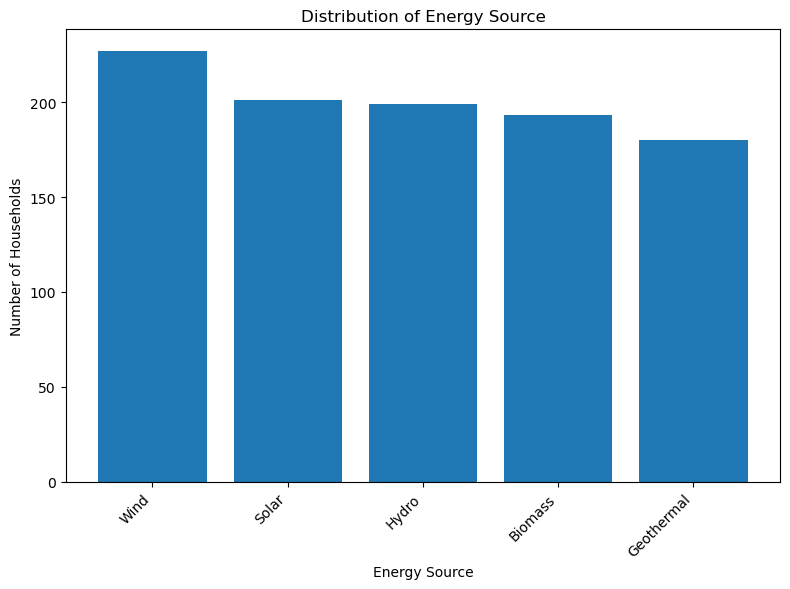

 ==> Wind is the most popular source, Geothermal is the least, the rest have similar usage
 ==> Popularity of wind and solar enegy


In [29]:
energy_source_counts = df['Energy_Source'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(energy_source_counts.index, energy_source_counts.values)
plt.title('Distribution of Energy Source')
plt.xlabel('Energy Source')
plt.ylabel('Number of Households')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(" ==> Wind is the most popular source, Geothermal is the least, the rest have similar usage")
print(" ==> Popularity of wind and solar enegy")

### ii) Distribution by Region

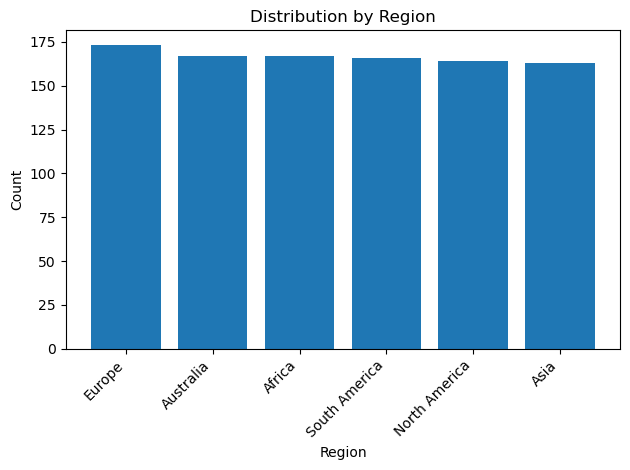

==> Roughly the same


In [30]:
counts = df['Region'].value_counts()
plt.figure()
plt.bar(counts.index, counts.values)
plt.title('Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("==> Roughly the same")

### iii) Income level distribution

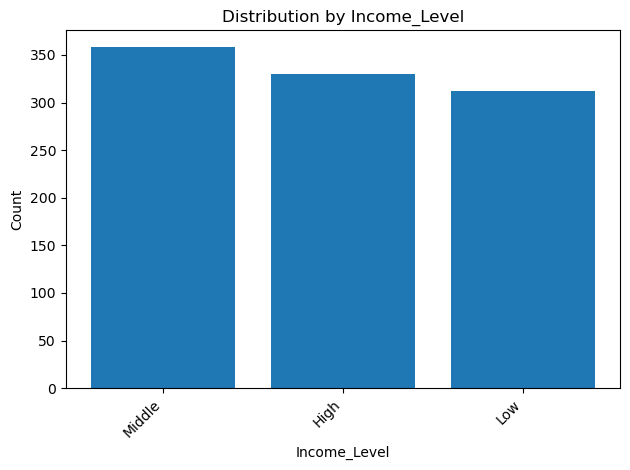

==> Middle > High > Low


In [31]:
counts = df['Income_Level'].value_counts()
plt.figure()
plt.bar(counts.index, counts.values)
plt.title('Distribution by Income_Level')
plt.xlabel('Income_Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("==> Middle > High > Low")

### vi) Subsidy distribution

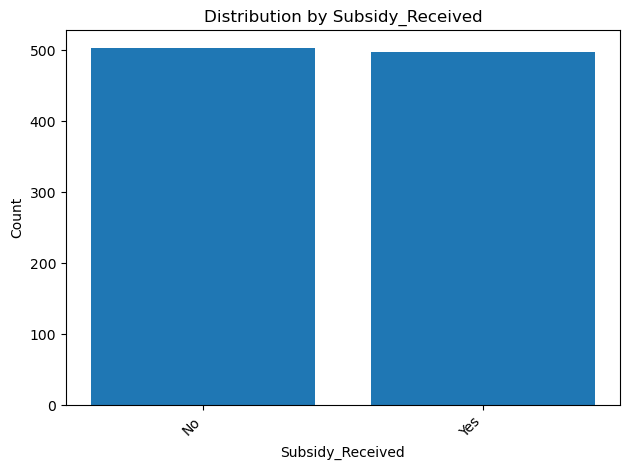

 ==> Balanced


In [32]:
counts = df['Subsidy_Received'].value_counts()
plt.figure()
plt.bar(counts.index, counts.values)
plt.title('Distribution by Subsidy_Received')
plt.xlabel('Subsidy_Received')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(" ==> Balanced")

### v) Monthly usage distribution

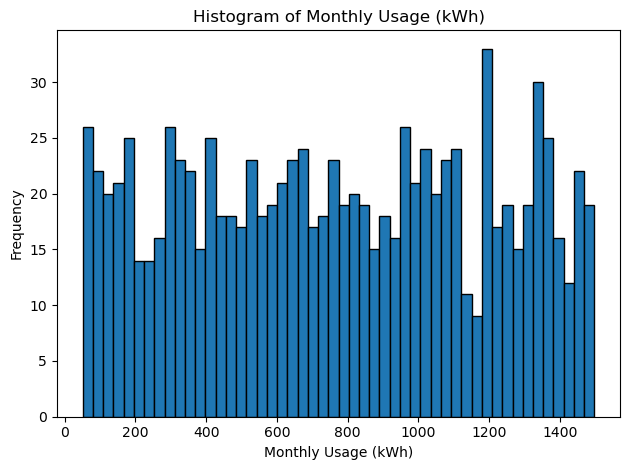

Statistics for Monthly Usage (kWh):
count    1000.000000
mean      767.325530
std       419.649102
min        50.740000
25%       402.730000
50%       760.190000
75%      1117.747500
max      1497.340000
Name: Monthly_Usage_kWh, dtype: float64
==> Widely distributed, non-uniform, tends towards higher usage


In [33]:
plt.figure()

plt.hist(df['Monthly_Usage_kWh'].dropna(), bins=50, edgecolor='black')
plt.title('Histogram of Monthly Usage (kWh)')
plt.xlabel('Monthly Usage (kWh)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print(f"Statistics for Monthly Usage (kWh):\n{df['Monthly_Usage_kWh'].describe()}")
print("==> Widely distributed, non-uniform, tends towards higher usage")

### vi) Household size distrubtion

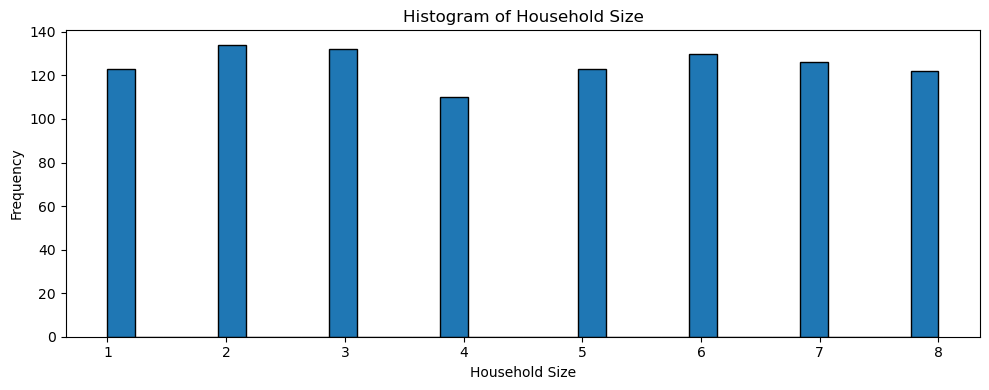

Statistics for Household_Size:
count    1000.000000
mean        4.480000
std         2.297581
min         1.000000
25%         2.000000
50%         5.000000
75%         6.000000
max         8.000000
Name: Household_Size, dtype: float64
=> Relatively balanced distribution, households of 2-3 people use the most renewable energy


In [34]:
plt.figure(figsize=(10, 4))

plt.hist(df['Household_Size'].dropna(), bins=30,edgecolor='black')
plt.title('Histogram of Household Size')
plt.xlabel('Household Size')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print(f"Statistics for Household_Size:\n{df['Household_Size'].describe()}")
print("=> Relatively balanced distribution, households of 2-3 people use the most renewable energy")

### vii) Distribution of new adopters

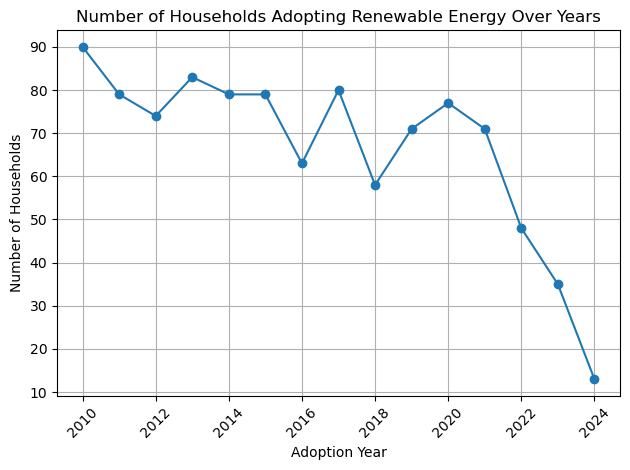

==> Decreasing over time


In [35]:
adoption_year_counts = df['Adoption_Year'].value_counts().sort_index()
plt.figure()
plt.plot(adoption_year_counts.index, adoption_year_counts.values, marker='o')
plt.title('Number of Households Adopting Renewable Energy Over Years')
plt.xlabel('Adoption Year')
plt.ylabel('Number of Households')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("==> Decreasing over time")

## **b) (Multivariate Analysis)**

### i) Cost saving by Region

<Figure size 640x480 with 0 Axes>

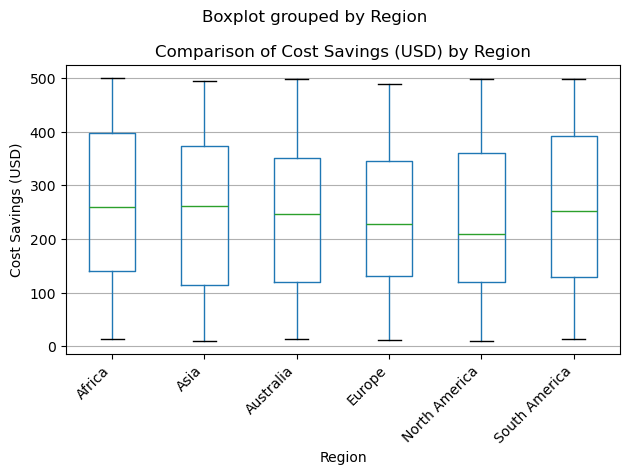

Cost saving by region:
                count        mean         std    min       25%     50%  \
Region                                                                  
Africa         167.0  259.135030  149.718802  14.19  139.9800  259.85   
Asia           163.0  252.629939  143.927525  10.46  113.7950  261.48   
Australia      167.0  243.535269  140.537335  12.59  119.2450  247.10   
Europe         173.0  240.958671  135.241274  11.02  130.6200  228.95   
North America  164.0  232.357744  142.322109  10.42  119.4525  209.16   
South America  166.0  261.883795  146.758914  13.63  128.2900  251.61   

                    75%     max  
Region                           
Africa         397.4100  499.83  
Asia           374.1900  495.07  
Australia      350.6950  499.53  
Europe         346.2700  489.73  
North America  360.3100  498.90  
South America  392.8275  499.31  


In [36]:
plt.figure()
df.boxplot(column='Cost_Savings_USD', by='Region')
plt.grid(axis='x')
plt.title('Comparison of Cost Savings (USD) by Region')
plt.xlabel('Region')
plt.ylabel('Cost Savings (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Cost saving by region:\n", df.groupby('Region')['Cost_Savings_USD'].describe())

**From this we can infer that**
- All regions have have similar usage of renewable energy
- Stable Median (Africa, Asia higher, North America lowest)
- High IQR (25% - 75%) --> High Spread
- South America have upper medium, high saving --> Benefits the most from renewable energy
- North America --> Low cost saving

### ii) Cost saving by energy source

<Figure size 640x480 with 0 Axes>

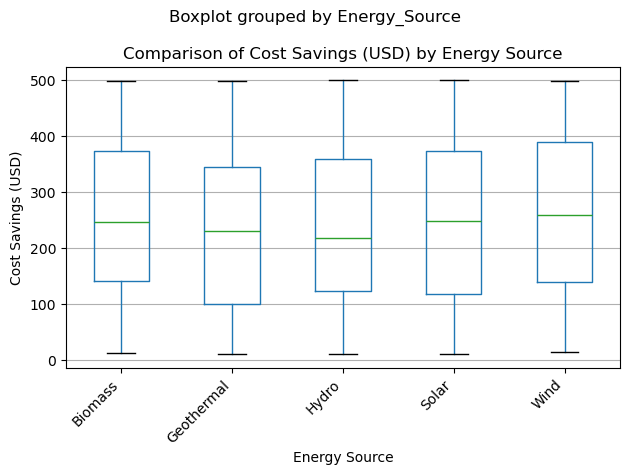

Comparison of Cost Savings (USD) by Energy Source:
                count        mean         std    min       25%      50%  \
Energy_Source                                                            
Biomass        193.0  257.462176  140.531474  12.59  141.1800  247.390   
Geothermal     180.0  230.052111  145.698974  10.42  100.5325  229.595   
Hydro          199.0  237.010804  141.774036  10.46  122.5800  218.310   
Solar          201.0  254.123383  143.513683  11.02  118.4900  249.050   
Wind           227.0  260.115947  143.197576  13.63  139.0950  259.300   

                   75%     max  
Energy_Source                   
Biomass        373.550  499.31  
Geothermal     344.835  499.12  
Hydro          358.330  499.53  
Solar          372.640  499.83  
Wind           389.325  498.90  


In [37]:
plt.figure()
df.boxplot(column='Cost_Savings_USD', by='Energy_Source')
plt.grid(axis='x')
plt.title('Comparison of Cost Savings (USD) by Energy Source')
plt.xlabel('Energy Source')
plt.ylabel('Cost Savings (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Comparison of Cost Savings (USD) by Energy Source:\n", df.groupby('Energy_Source')['Cost_Savings_USD'].describe())

- Wind & Solar have the highest median (Geothermal has the lowest)
- Wind provide better and more stable energy savings
- Overall balanced
Analyze each energy source:
a) Wind
- Stable, fewer instances of low savings
- Most efficient

b) Solar
- Second most efficient choice, popular

c) Geothermal
- Lower medium use

d) Hydro
- Tends to the left, more instances of low savings

e) Biomass
- Somewhat stable

### iii) Impact of Subsidy towards cost savings

<Figure size 800x600 with 0 Axes>

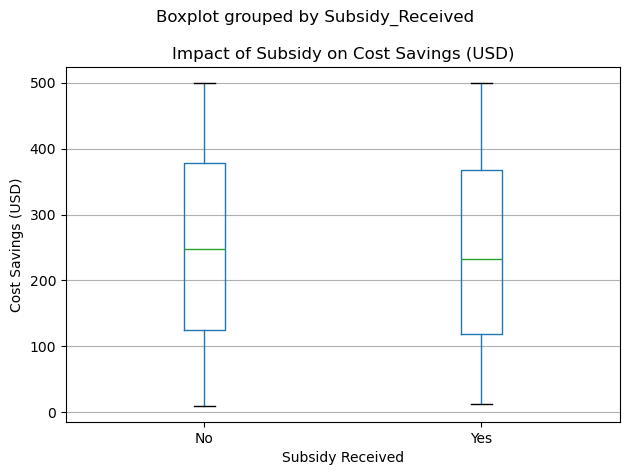

                  count        mean         std    min      25%     50%  \
Subsidy_Received                                                          
No                503.0  251.463101  146.107664  10.42  124.955  248.47   
Yes               497.0  245.279497  140.124945  12.59  119.190  233.34   

                     75%     max  
Subsidy_Received                  
No                378.49  499.83  
Yes               367.33  498.90  


In [38]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Cost_Savings_USD', by='Subsidy_Received')
plt.grid(axis='x')
plt.title('Impact of Subsidy on Cost Savings (USD)')
plt.xlabel('Subsidy Received')
plt.ylabel('Cost Savings (USD)')
plt.tight_layout()
plt.show()
print(df.groupby('Subsidy_Received')['Cost_Savings_USD'].describe())

- The group without subsidy on average saves more
- The group with subsidy have more instances of lower savings
--> Perhaps the households that received subsidy have lower energy demand
--> And/Or the rest tends to use less energy because they didnt received subsidy

### iv) Adoption trend

<Figure size 640x480 with 0 Axes>

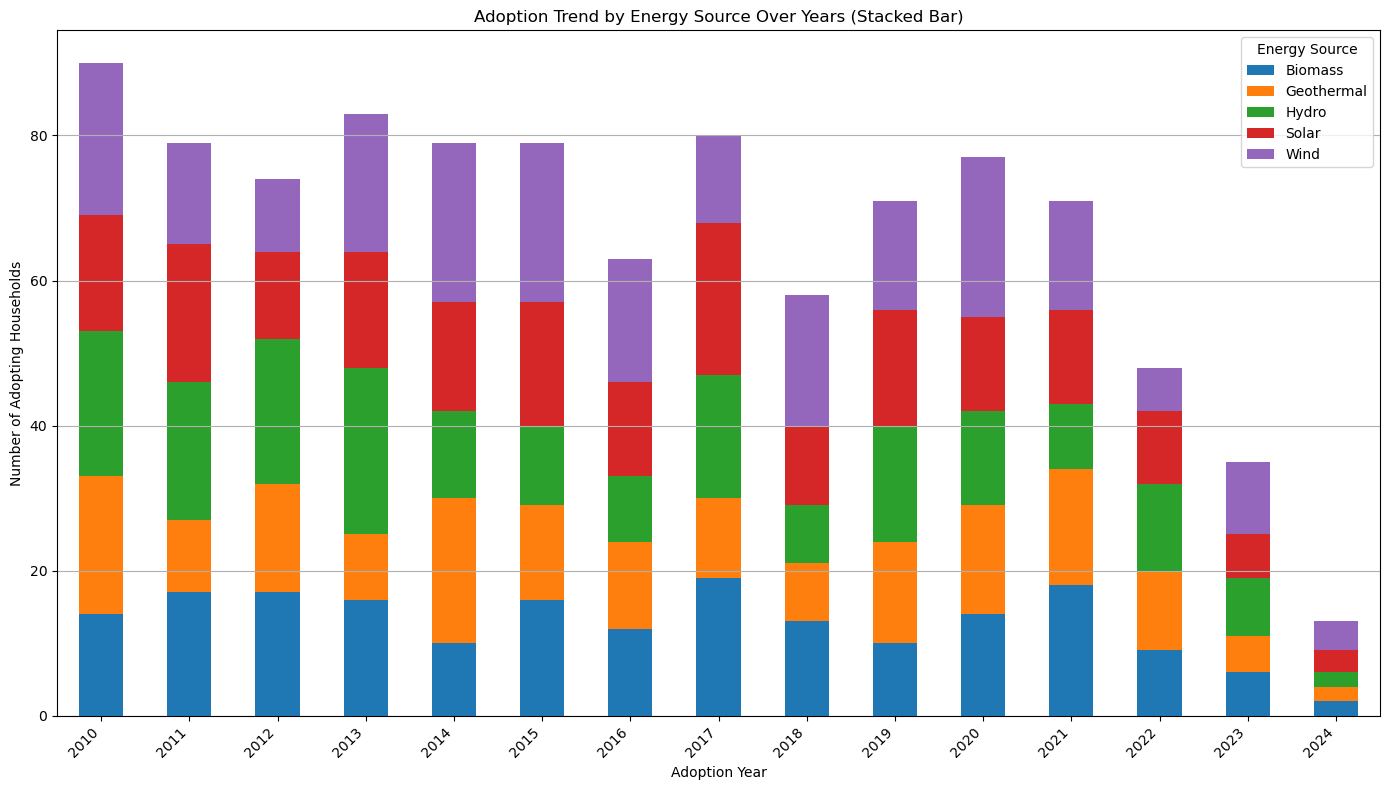

Adoption Trend by Energy Source Over Years:
 Energy_Source  Biomass  Geothermal  Hydro  Solar  Wind
Adoption_Year                                         
2020                14          15     13     13    22
2021                18          16      9     13    15
2022                 9          11     12     10     6
2023                 6           5      8      6    10
2024                 2           2      2      3     4


In [39]:
adoption_by_source_year = pd.crosstab(df['Adoption_Year'], df['Energy_Source'])
plt.figure()
adoption_by_source_year.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Adoption Trend by Energy Source Over Years (Stacked Bar)')
plt.xlabel('Adoption Year')
plt.ylabel('Number of Adopting Households')
plt.legend(title='Energy Source')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
print("Adoption Trend by Energy Source Over Years:\n", adoption_by_source_year.tail())

It appears to be a decrease in the number of new adopters over the years

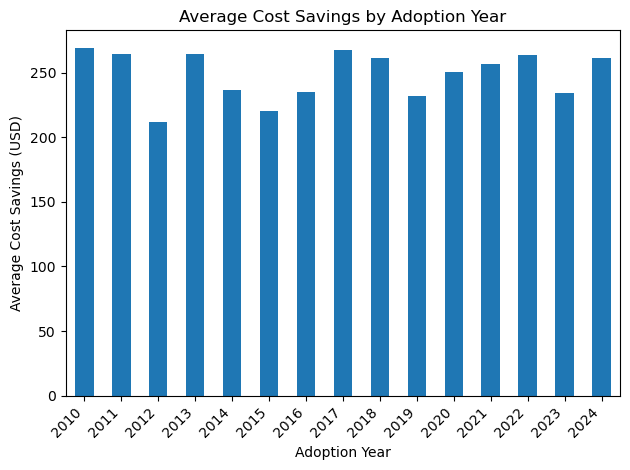

Average Cost Savings by Adoption Year:
 Adoption_Year
2010    269.250667
2011    264.191519
2012    211.470946
2013    264.136386
2014    236.928101
2015    220.376329
2016    234.995556
2017    267.455250
2018    261.655862
2019    231.863662
2020    250.722078
2021    256.471127
2022    263.526250
2023    233.877714
2024    261.339231
Name: Cost_Savings_USD, dtype: float64


In [40]:
avg_savings_by_adoption_year = df.groupby('Adoption_Year')['Cost_Savings_USD'].mean()
plt.figure()
avg_savings_by_adoption_year.plot(kind='bar')
plt.title('Average Cost Savings by Adoption Year')
plt.xlabel('Adoption Year')
plt.ylabel('Average Cost Savings (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Average Cost Savings by Adoption Year:\n", avg_savings_by_adoption_year)

==> An increased trend of using renewable energy recently

### v) Correlation matrix

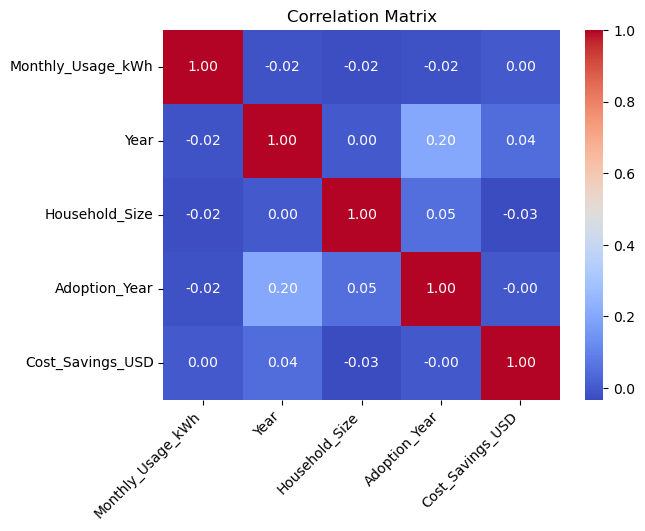

In [41]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure()
sns.heatmap(numerical_df.corr(),annot = True, cmap='coolwarm',fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix')
plt.show()

### vi) Cumulative impact of renewable energy on cost saving

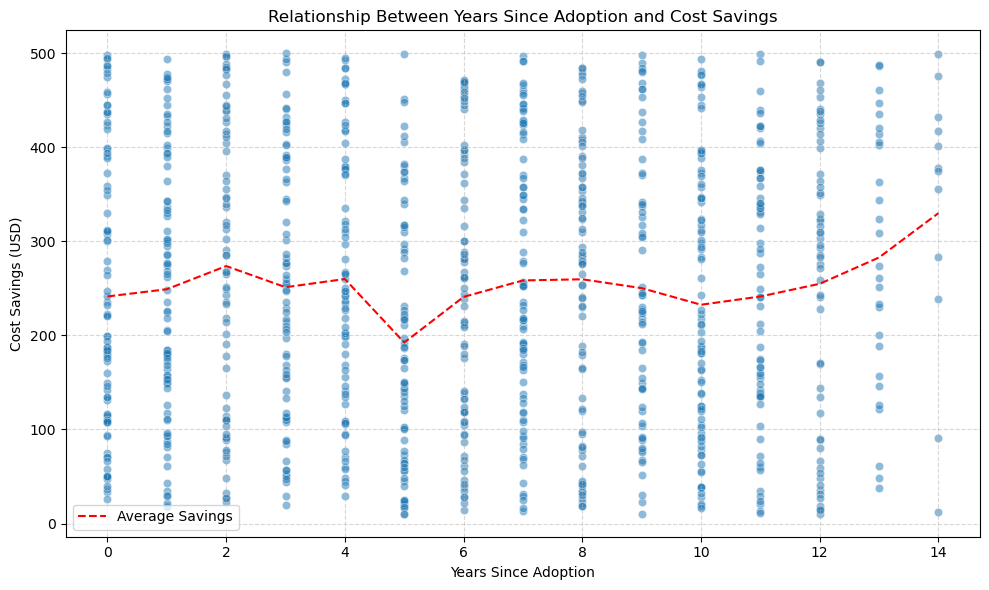

Years_Since_Adoption statistics:
 count    1000.000000
mean        6.000000
std         3.938466
min         0.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        14.000000
Name: Years_Since_Adoption, dtype: float64
Correlation between Years_Since_Adoption và Cost_Savings_USD: 0.01802285667908815
Renewable energy usage leads to long-term cost savings generally


In [42]:
df['Years_Since_Adoption'] = df['Year'] - df['Adoption_Year']
plt.figure(figsize=(10, 6))
plt.scatter(df['Years_Since_Adoption'], df['Cost_Savings_USD'], alpha=0.5, edgecolors='w', linewidth=0.5)
avg_savings_by_years_adopted = df.groupby('Years_Since_Adoption')['Cost_Savings_USD'].mean().reset_index()
plt.plot(avg_savings_by_years_adopted['Years_Since_Adoption'], avg_savings_by_years_adopted['Cost_Savings_USD'], color='red', linestyle='--', label='Average Savings')
plt.title('Relationship Between Years Since Adoption and Cost Savings')
plt.xlabel('Years Since Adoption')
plt.ylabel('Cost Savings (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
print("Years_Since_Adoption statistics:\n", df['Years_Since_Adoption'].describe())
print("Correlation between Years_Since_Adoption và Cost_Savings_USD:", df['Years_Since_Adoption'].corr(df['Cost_Savings_USD']))
print("Renewable energy usage leads to long-term cost savings generally")